In [2]:
import pandas as pd
import os
import tqdm
import numpy as np
import pprint
import pickle

In [16]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline

In [3]:
data_path = 'mathorcup_recom_listwise/data/'
user_path = 'data_splitted_by_user_id'

In [9]:
if not os.path.exists(data_path + 'userID2idx.pickle'):
    train_df = pd.read_csv(data_path + 'train_data.csv', dtype=str)
    train_userID = set(train_df.loc[:, 'userID'])
    userID2idx = {_: str(i).zfill(7) for i, _ in enumerate(train_userID)}
    with open(data_path + 'userID2idx.pickle', 'wb') as handle:
        pickle.dump(userID2idx, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path + 'userID2idx.pickle', 'rb') as handle:
    userID2idx = pickle.load(handle)
len(userID2idx)

958123

In [10]:
with open(data_path + 'contentID2idx.pickle', 'rb') as handle:
    contentID2idx = pickle.load(handle)

In [6]:
loyal_df = pd.read_csv(data_path + 'dataLen4loyalUser.csv', dtype=str)
loyal_df

,userID,userIdx,dataLen
0,2019831604,0000000,84
1,428614678,0000011,442
2,1370469668,0000013,165
3,2271414200,0000018,221
4,2441160884,0000022,118
...,...,...,...
218739,2436887590,0958111,136
218740,1611848354,0958112,61
218741,2413577186,0958113,127
218742,2417819566,0958114,115


In [8]:
loyal_clickeds = np.empty([218744, 1485], dtype=np.float32)
loyal_clickeds[:] = np.nan
loyal_durations = np.empty([218744, 1485], dtype=np.float32)
loyal_durations[:] = np.nan
loyal_recommeds = np.zeros([218744, 1485], dtype=np.int32)

In [23]:
for _, (idx, row) in tqdm.tqdm(enumerate(loyal_df.iterrows())):  # _ in range(218744), idx in range(958123)
    userIdx = row['userIdx']
    aaa, bb, cc = userIdx[0:3], userIdx[3:5], userIdx[5:7]
    temp_df = pd.read_csv('data_splitted_by_user_id/{}/{}/{}.csv'.format(aaa, bb, cc), dtype=str)
    userID = temp_df.loc[0, 'userID']
    assert userIdx == userID2idx[userID]
    clickeds = np.empty(1485)
    clickeds[:] = np.nan
    durations = np.empty(1485)
    durations[:] = np.nan
    recommeds = np.zeros(1485)
    for s in temp_df.sequence:
        for icd in s.split(';'):
            i, c, d = icd.split(':')
            contentIdx = contentID2idx[i]
            if np.isnan(clickeds[contentIdx]):
                clickeds[contentIdx] = 0
                durations[contentIdx] = 0
            if eval(c):  # recommended and read
                clickeds[contentIdx] += 1
                durations[contentIdx] += eval(d)
            recommeds[contentIdx] += 1
    loyal_clickeds[_, :] = clickeds
    loyal_durations[_, :] = durations
    loyal_recommeds[_, :] = recommeds

218744it [32:29, 112.23it/s]


In [24]:
with open(data_path + 'loyal_raw_clickeds.pickle', 'wb') as handle:
    pickle.dump(loyal_clickeds, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path + 'loyal_raw_durations.pickle', 'wb') as handle:
    pickle.dump(loyal_durations, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path + 'loyal_raw_recommeds.pickle', 'wb') as handle:  # to distinguish from loyal_recommeds, which has been normed
    pickle.dump(loyal_recommeds, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
np.where(clickeds == 0)

(array([   3,   16,   18,   19,   38,   42,   44,   45,   49,   52,   56,
          65,  103,  131,  139,  151,  183,  229,  230,  256,  262,  272,
         302,  328,  331,  332,  337,  347,  383,  402,  443,  463,  473,
         508,  509,  581,  585,  613,  614,  615,  618,  619,  637,  648,
         717,  744,  747,  785,  796,  803,  804,  827,  828,  855,  890,
         896,  897,  904,  905,  937,  958,  987, 1012, 1017, 1057, 1072,
        1083, 1143, 1159, 1175, 1197, 1211, 1217, 1220, 1253, 1278, 1288,
        1342, 1352, 1379, 1391, 1394, 1400, 1409, 1461, 1475], dtype=int64),)

In [21]:
np.where(durations == 0)

(array([   3,   16,   18,   19,   38,   42,   44,   45,   49,   52,   56,
          65,  103,  131,  139,  151,  183,  229,  230,  256,  262,  272,
         302,  328,  331,  332,  337,  347,  383,  402,  443,  463,  473,
         508,  509,  581,  585,  613,  614,  615,  618,  619,  637,  648,
         717,  744,  747,  785,  796,  803,  804,  827,  828,  855,  890,
         896,  897,  904,  905,  937,  958,  987, 1012, 1017, 1057, 1072,
        1083, 1143, 1159, 1175, 1197, 1211, 1217, 1220, 1253, 1278, 1288,
        1342, 1352, 1379, 1391, 1394, 1400, 1409, 1461, 1475], dtype=int64),)

<BarContainer object of 1485 artists>

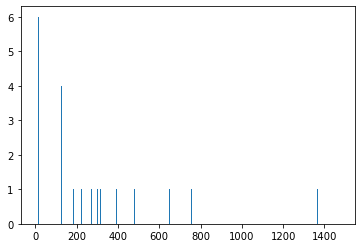

In [17]:
plt.bar(range(len(loyal_clickeds[0,:])), loyal_clickeds[0,:], width=2)

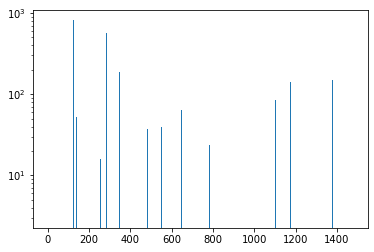

In [19]:
plt.bar(range(len(loyal_durations[0,:])), loyal_durations[0,:], width=2)
plt.yscale('log')